Used for test SHAP value: based on the selected ASVs, most of which are indicators of Non burn soil (which means if it has a higher abundance then it is a not burn soil; these ASV will decrease if it get burned); the only ASV we found will increase if get burned is ASV7.

In [1]:
import sys
sys.path.append('../../../Code')
import loadData 
import RunML
import FS
import metric

import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import pickle

2025-03-10 12:31:08.218457: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data,burn_label,un_label,duration_label,ASVs,df=loadData.loadSoilData("../data/count_table/merge_proportion_asv_smoky_moutain.csv")

In [3]:
df = pd.DataFrame(data,columns = ASVs)# the function requires a dataframe with feature names

In [4]:
print(data.shape)
print(burn_label.shape)

(59, 1768)
(59,)


In [5]:
ASVs = np.array(ASVs)
ASVs

array(['ASV1', 'ASV2', 'ASV3', ..., 'ASV3215', 'ASV3216', 'ASV3217'],
      dtype='<U7')

### 2. Calculating H score for each OTU

Perform feature selection, this is done by calculating Kruskal-Wallis H-test on each OTU for each environmental factor, each OTU/ASV is given a h score.

### 3. Select OTUs

dict_keys(['selected_data', 'selected_columnames', 'selected_indices', 'relative_abundance_data', 'H_score'])

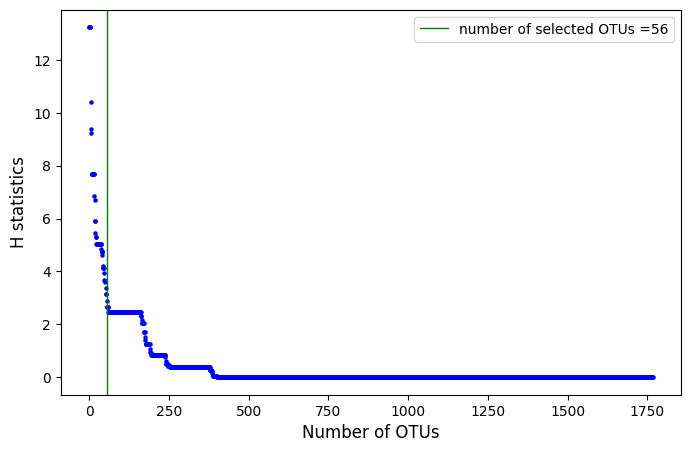

In [6]:
# select the OTUs

selectedresult=FS.SelectMicro_fun(df,burn_label)
    
selectedresult.keys()

In [7]:
selectedOTU_index_list = selectedresult['selected_indices']
selectedASV_list = selectedresult['selected_columnames']
X_FS_list = selectedresult['selected_data']
data = selectedresult['relative_abundance_data']


### 4. Model (default RF or SVM) 
The SVM model is always predicting one class, consider to fine tune the model's parameters.

In [8]:

targetLabel=burn_label
print("The response variable and its counts are:")
print(targetLabel.value_counts())

X_FS = X_FS_list


The response variable and its counts are:
Burn
Yes    42
No     17
Name: count, dtype: int64


In [9]:
print(f'The shape of the original dataset is ',np.shape(data))
print(f'The shape of the SelectMicro dataset is ',np.shape(X_FS))


The shape of the original dataset is  (59, 1768)
The shape of the SelectMicro dataset is  (59, 56)


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(targetLabel)  

[ 3  4  5 21 25 33 34 35 40 51 52 55]
[ 2  8 13 14 24 26 29 36 42 45 50 58]
[ 0  1  7  9 12 16 17 18 23 28 53 54]
[ 6 10 20 30 31 32 37 38 46 47 56 57]
[11 15 19 22 27 39 41 43 44 48 49]


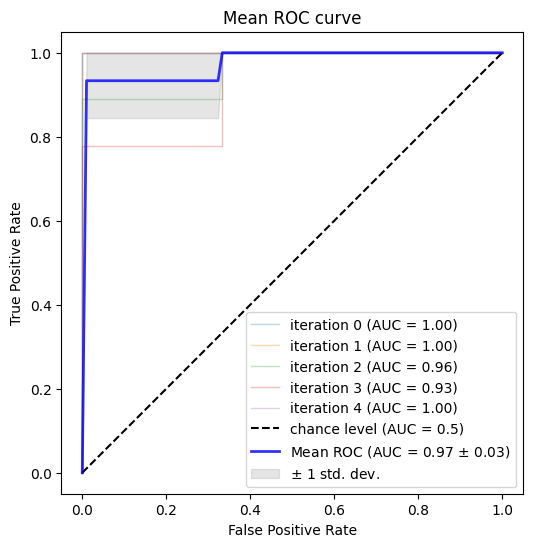

Accuracy: 0.897 (0.039), F1: 0.933 (0.022),MCC: 0.740 (0.113),AUC: 0.973 (0.030)


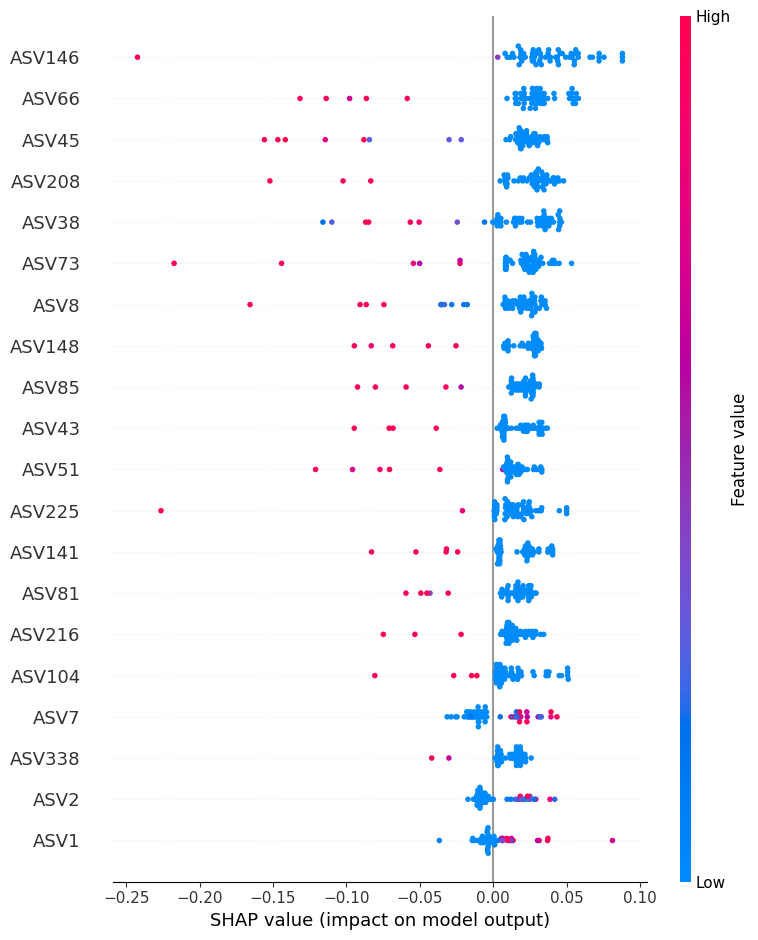

In [11]:
X_FS_df = pd.DataFrame(X_FS,columns=selectedASV_list)
result1 =RunML.RF_model_SCV(X_FS_df,y,plot=True,SMOTE=True,y_base=1)

(0, 56, 2)
       ASV66     ASV81     ASV85  ASV141    ASV148     ASV43     ASV73  \
3   0.000000  0.000000  0.000000     0.0  0.000000  0.061344  0.000000   
4   0.033755  0.029274  0.040127     0.0  0.033257  0.000000  0.011351   
5   0.000000  0.000000  0.000000     0.0  0.000000  0.013375  0.000000   
21  0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   
25  0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   
33  0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   
34  0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   
35  0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   
40  0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   
51  0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   
52  0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   
55  0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   

       ASV38  ASV139  ASV1

       ASV66  ASV81    ASV85    ASV141  ASV148    ASV43  ASV73     ASV38  \
0   0.000000    0.0  0.00000  0.000000     0.0  0.00000    0.0  0.000000   
1   0.059478    0.0  0.06165  0.010654     0.0  0.00000    0.0  0.000000   
7   0.000000    0.0  0.00000  0.000000     0.0  0.00000    0.0  0.011905   
9   0.000000    0.0  0.00000  0.000000     0.0  0.00000    0.0  0.000000   
12  0.000000    0.0  0.00000  0.000000     0.0  0.00000    0.0  0.000000   
16  0.000000    0.0  0.00000  0.000000     0.0  0.00000    0.0  0.000000   
17  0.000000    0.0  0.00000  0.000000     0.0  0.00000    0.0  0.000000   
18  0.000000    0.0  0.00000  0.000000     0.0  0.00000    0.0  0.000000   
23  0.000000    0.0  0.00000  0.000000     0.0  0.00000    0.0  0.000000   
28  0.000000    0.0  0.00000  0.000000     0.0  0.02219    0.0  0.000000   
53  0.000000    0.0  0.00000  0.000000     0.0  0.00000    0.0  0.000000   
54  0.000000    0.0  0.00000  0.000000     0.0  0.00000    0.0  0.000000   

    ASV139 

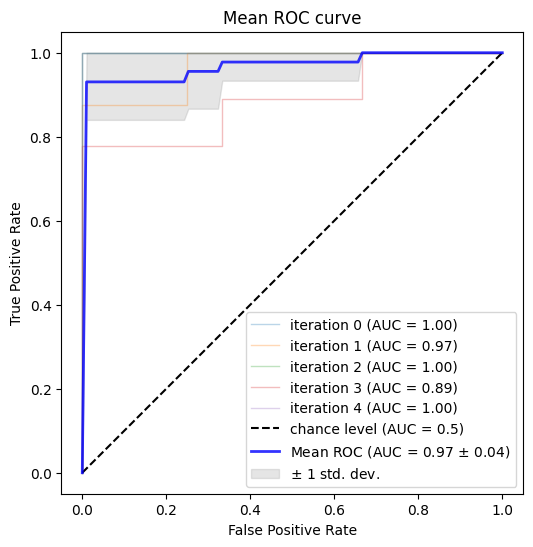

In [31]:
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

# performance reports
accuracy_results = list()
f1_results = list()
precision_results = list()
recall_results = list()

# preparation for ROC curve
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# preparation for SHAP
enriched_all = pd.DataFrame(selectedASV_list, columns = ['Taxa'])
shap_values_all = np.empty((0, X_FS.shape[1],2))
print(shap_values_all.shape)
test_sets_ix = []
idx = 0

fig, ax = plt.subplots(figsize=(6, 6))
X_FS_df = pd.DataFrame(X_FS,columns=selectedASV_list)
for train_ix, test_ix in cv_outer.split(X_FS_df,y):
# split data
    
    X_train, X_test = X_FS_df.iloc[train_ix], X_FS_df.iloc[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    
    print(X_test)

    clf = RandomForestClassifier(n_jobs=5, random_state=777)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)
    y_prob1 = y_prob[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    #mcc = metric.mcc_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    # store the result
    accuracy_results.append(accuracy)
    f1_results.append(f1)
    
    # ROC curve
    viz = RocCurveDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        name=f"iteration {idx}",
        alpha=0.3,
        lw=1,ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
    # SHAP values
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X_test)
    shap_obj = explainer(X_test)
    shap_values_all = np.concatenate((shap_values_all, shap_values), axis=0) 
    test_sets_ix.append(test_ix)
    
    
    high_index_df = pd.DataFrame(shap_obj.data, columns=shap_obj.feature_names, index=X_test.index)
    print(high_index_df)
    high_index = pd.DataFrame(shap_obj.data, columns=shap_obj.feature_names, index=X_test.index).idxmax()# finds the feature's index with the highest value for each sample. returns a seires
    print(high_index)
    shap_1 = pd.DataFrame(shap_values[:,:,1], columns=shap_obj.feature_names, index=X_test.index)
    enriched = list()
    
    for v, i in high_index.items(): #iterate over each row
        sv = shap_1[v].loc[i]
        print(v)
        print(i)
        print(sv)
        if sv<0:
            sv = "Level 0"
        else:
            sv = "Level 1"
        enriched.append(
            {
                'Taxa': v,
                'enriched': sv
            }
        )
    enriched = pd.DataFrame(enriched)
    enriched.rename(columns={'enriched': 'enriched{}'.format(idx+1)}, inplace=True)
    enriched_all = enriched_all.merge(enriched, on='Taxa', how='outer')

    idx += 1
# continue ROC
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve",
)
ax.axis("square")
ax.legend(loc="lower right")
#plt.show()


    

# sort x based on the test dataset index
test_sets_ix = np.concatenate(test_sets_ix)
X_test = pd.DataFrame(X_FS[test_sets_ix])
X_test.columns = selectedASV_list



In [30]:
print('Accuracy: %.3f (%.3f), F1: %.3f (%.3f)' % (np.mean(accuracy_results), np.std(accuracy_results), np.mean(f1_results), np.std(f1_results)))

Accuracy: nan (nan), F1: nan (nan)


/Users/menglinghe/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/menglinghe/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/menglinghe/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/menglinghe/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/menglinghe/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
shap_1_all = shap_values_all[:,:,1]


shap.summary_plot(shap_1_all, X_test, plot_type="bar")

shap.summary_plot(shap_1_all, X_test)

In [ ]:
# SHAP feature importances
mean_shap_feature_values = pd.DataFrame(shap_1_all, columns=selectedASV_list).abs().mean(axis=0).sort_values(ascending=False)
mean_shap_feature_values.index.name = 'features'
mean_shap_feature_values.name = 'mean_shap'
mean_shap_feature_values = mean_shap_feature_values.reset_index()
#mean_shap_feature_values.to_csv('data/SHAP_feature_importance_' + rank + '.csv', index=False)


In [32]:
enriched_all

,Taxa,enriched1,enriched2,enriched3,enriched4,enriched5
0,ASV66,Level 0,Level 0,Level 0,Level 0,Level 1
1,ASV81,Level 0,Level 0,Level 1,Level 0,Level 1
2,ASV85,Level 0,Level 0,Level 0,Level 0,Level 1
3,ASV141,Level 1,Level 0,Level 0,Level 0,Level 0
4,ASV148,Level 0,Level 0,Level 1,Level 0,Level 0
5,ASV43,Level 0,Level 0,Level 0,Level 1,Level 1
6,ASV73,Level 0,Level 0,Level 1,Level 0,Level 0
7,ASV38,Level 0,Level 0,Level 0,Level 0,Level 1
8,ASV139,Level 1,Level 0,Level 1,Level 0,Level 0
9,ASV154,Level 1,Level 1,Level 1,Level 0,Level 1


In [ ]:
print(enriched)



In [ ]:
# Get the indices where array1 is not zero
indices = np.where(X_test['ASV191'] != 0)[0]
indices

In [ ]:
ASV191_df = X_test.loc[indices]


In [ ]:
SHAP_ASV191 = shap_1_all[indices,:]

In [ ]:
shap.initjs()# base line is induced
shap.force_plot(0.49, SHAP_ASV191[1,:], ASV191_df.iloc[1])


In [ ]:
shap.force_plot(0.49, SHAP_ASV191[0,:], ASV191_df.iloc[0])